# HRANALYTICS_PROJECT


Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('HR_Employee_Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in the dataset 

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Description of column


1.Age:
The age of the employees.

2.Attrition:
The target variable indicating whether an employee has left the company or not (Yes/No).

3.BusinessTravel: 
Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently).

4.DailyRate:
The daily rate of pay for employees.

5.Department: 
The department in which the employee works (e.g., Sales, Research & Development).

6.DistanceFromHome:
The distance of the employee's home from the workplace.

7.Education:
Employee's level of education.

8.EducationField:
The field of education or specialization of the employee.

9.EmployeeCount:
A count of employees (it may have a single constant value).

10.EmployeeNumber:
An identifier for each employee.

11.EnvironmentSatisfaction: 
Employee's satisfaction with their work environment.

12.Gender:
Gender of the employee.

13.HourlyRate: 
The hourly rate of pay for employees.

14.JobInvolvement:
Employee's job involvement or engagement level.

15.JobLevel: 
Employee's job level or position within the company.

16.JobRole: 
The specific role or position the employee holds.

17.JobSatisfaction:
Employee's job satisfaction level.

18.MaritalStatus:
Marital status of the employee.

19.MonthlyIncome: 
Monthly income of the employee.

20.MonthlyRate: 
Monthly rate of pay for employees.

21.NumCompaniesWorked:
The number of companies the employee has worked for.

22.Over18:
A binary indicator for employees being over 18 (it may have a single constant value).

23.OverTime:
Whether the employee works overtime (Yes/No).

24.PercentSalaryHike: 
The percentage increase in salary.

25.PerformanceRating: 
Employee's performance rating.

26.RelationshipSatisfaction:
Employee's satisfaction with their work relationships.

27.StandardHours: 
Standard number of working hours (it may have a single constant value).

28.StockOptionLevel: 
Level of stock options offered to employees.

29.TotalWorkingYears:
Total years of working experience.

30.TrainingTimesLastYear:
The number of training sessions attended by the employee in the last year.

31.WorkLifeBalance: 
Employee's perception of their work-life balance.

32.YearsAtCompany:
The number of years the employee has been with the company.

33.YearsInCurrentRole:
The number of years the employee has been in their current role.

34.YearsSinceLastPromotion: 
The number of years since the employee's last promotion.

35.YearsWithCurrManager: 
The number of years the employee has been working under their current manager.

In [8]:
# Checking for the missing values in the dataset.

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 Above observation shows there is no missing values in the dataset.

In [9]:
# Checking the information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

According to above, This is a summary of HR attrition dataset, which includes 1,470 entries and 35 columns. Here are some key observations:

The dataset has 1,470 rows, and each row represents an individual employee in the organization.

There are 35 columns, each representing a different attribute or feature associated with employees.

The dataset contains both numeric (int64) and categorical (object) data types. We'll need to preprocess and handle categorical data appropriately.

Some of the key features include 'Age,' 'Attrition,' 'BusinessTravel,' 'DailyRate,' 'Department,' 'Education,' 'Gender,' 'JobRole,' 'MaritalStatus,' 'MonthlyIncome,' 'NumCompaniesWorked,' 'OverTime,' 'TotalWorkingYears,' 'WorkLifeBalance,' and various others that can be valuable for analyzing attrition.

In [10]:
# Count columns with data type 'int64'
int_columns = df.select_dtypes(include=['int64']).columns
num_int_columns = len(int_columns)

# Count columns with data type 'object'
object_columns = df.select_dtypes(include=['object']).columns
num_object_columns = len(object_columns)

print(f"Number of 'int64' columns: {num_int_columns}")
print(f"Number of 'object' columns: {num_object_columns}")

Number of 'int64' columns: 26
Number of 'object' columns: 9


In [11]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset is :',nf)
print('Categorical features in the dataset is :', cf)

Numerical features in the dataset is : Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical features in the dataset is : Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [12]:
# Drop the specified columns
df = df.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Verify that the columns have been dropped
print("Columns have been dropped:")
print(df.columns)


Columns have been dropped:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Attrition' column
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

# Verify the encoding results
df.head()  


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Data Visualization:

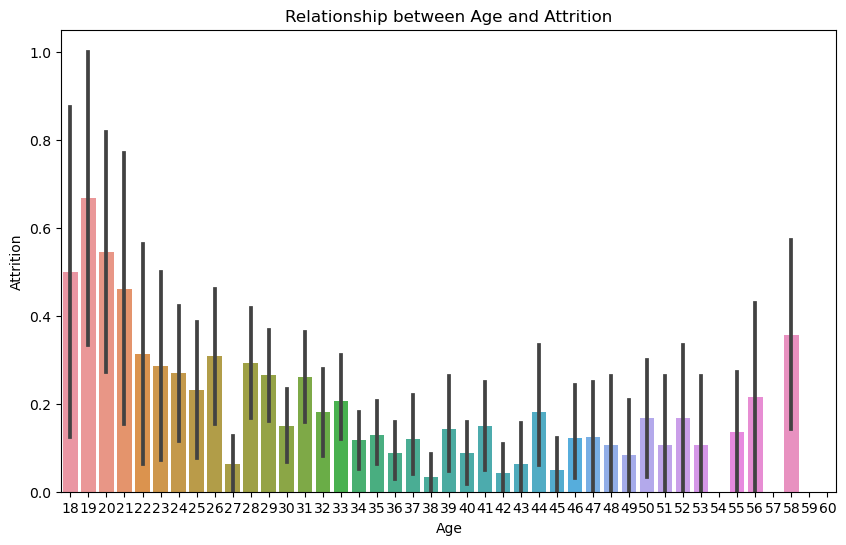

In [15]:
# Create a box plot to visualize the relationship between 'Age' and 'Attrition'
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Attrition', data=df)
plt.title("Relationship between Age and Attrition")
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.show()

In [16]:
# Group by the 'Attrition' column and calculate the average age
grouped = df.groupby('Age')['Attrition'].mean()

# Display the result
print(grouped)

Age
18    0.500000
19    0.666667
20    0.545455
21    0.461538
22    0.312500
23    0.285714
24    0.269231
25    0.230769
26    0.307692
27    0.062500
28    0.291667
29    0.264706
30    0.150000
31    0.260870
32    0.180328
33    0.206897
34    0.116883
35    0.128205
36    0.086957
37    0.120000
38    0.034483
39    0.142857
40    0.087719
41    0.150000
42    0.043478
43    0.062500
44    0.181818
45    0.048780
46    0.121212
47    0.125000
48    0.105263
49    0.083333
50    0.166667
51    0.105263
52    0.166667
53    0.105263
54    0.000000
55    0.136364
56    0.214286
57    0.000000
58    0.357143
59    0.000000
60    0.000000
Name: Attrition, dtype: float64


 In the age group 18, the attrition rate is 50%, which means half of the employees in that age group have experienced attrition.

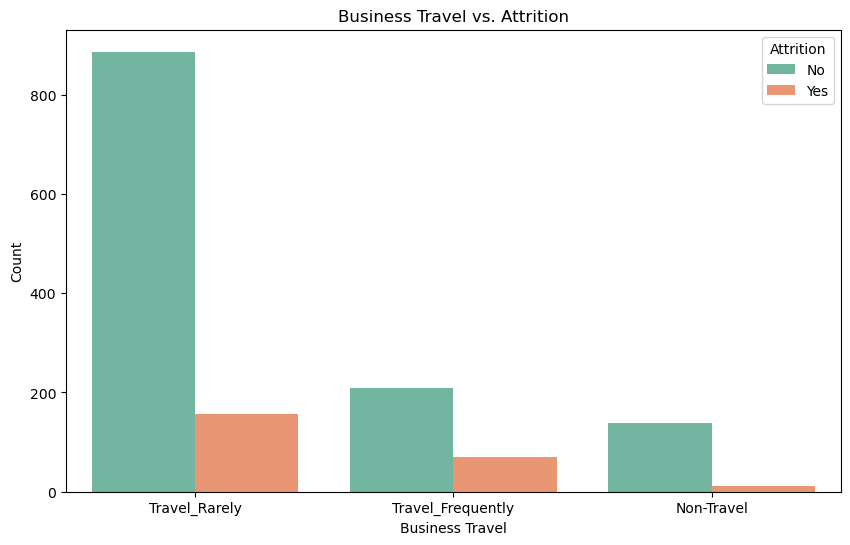

In [17]:
# Create a bar plot to visualize 'Business Travel' vs. 'Attrition'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='Set2')
plt.title('Business Travel vs. Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [18]:
# Group by 'BusinessTravel' and calculate the attrition rate
attrition_by_business_travel = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_business_travel)

Attrition                 0         1
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


For employees who have 'Non-Travel' as their business travel level:

92% have not experienced attrition ('No').
8% have experienced attrition ('Yes').

For employees with 'Travel_Frequently' as their business travel level:

75.09% have not experienced attrition ('No').
24.91% have experienced attrition ('Yes').

For employees with 'Travel_Rarely' as their business travel level:

85.04% have not experienced attrition ('No').
14.96% have experienced attrition ('Yes').

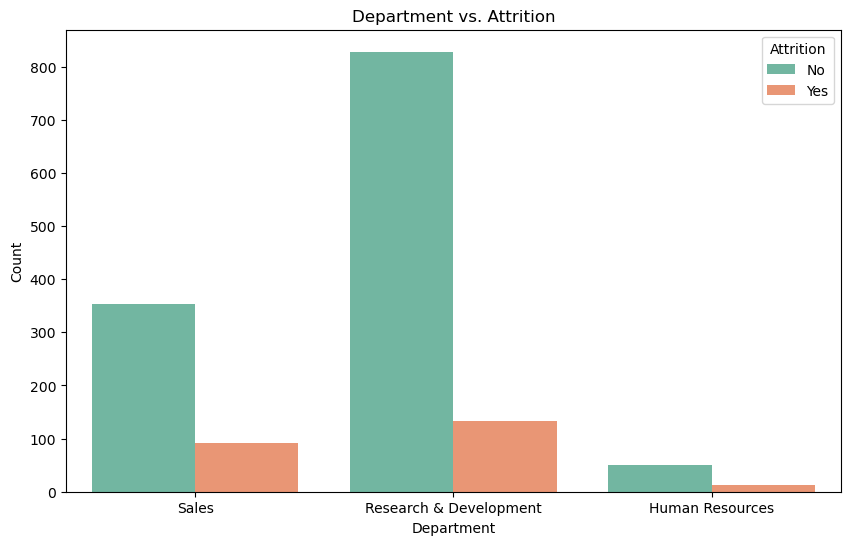

In [19]:
# Create a bar plot to visualize 'Department' vs. 'Attrition'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [20]:
# Group by 'Department' and calculate the attrition rate
attrition_by_department = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_department)

Attrition                      0         1
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


For the 'Human Resources' department:

80.95% of employees have not experienced attrition ('No').
19.05% of employees have experienced attrition ('Yes').

For the 'Research & Development' department:

86.16% of employees have not experienced attrition ('No').
13.84% of employees have experienced attrition ('Yes').

For the 'Sales' department:
    

79.37% of employees have not experienced attrition ('No').
20.63% of employees have experienced attrition ('Yes').

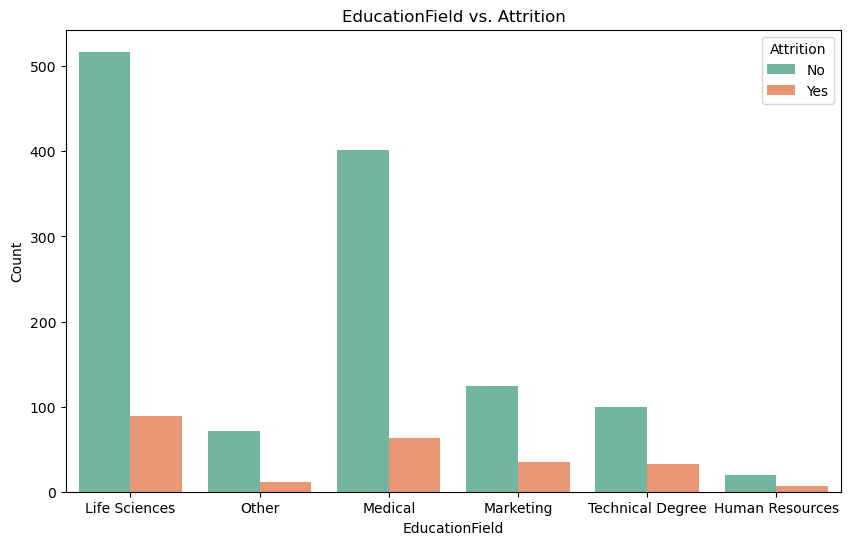

In [21]:
# Create a bar plot to visualize 'EducationField' vs. 'Attrition'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='Set2')
plt.title('EducationField vs. Attrition')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [22]:
# Group by 'EducationField' and calculate the attrition rate
attrition_by_education_field = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_education_field)

Attrition                0         1
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424


For employees with an 'EducationField' in 'Human Resources':
    

74.07% have not experienced attrition ('No').
25.93% have experienced attrition ('Yes').

For employees with an 'EducationField' in 'Life Sciences':
    

85.31% have not experienced attrition ('No').
14.69% have experienced attrition ('Yes').

For employees with an 'EducationField' in 'Marketing':

    
77.99% have not experienced attrition ('No').
22.01% have experienced attrition ('Yes').


For employees with an 'EducationField' in 'Medical':
    

86.42% have not experienced attrition ('No').
13.58% have experienced attrition ('Yes').

For employees with an 'EducationField' labeled 'Other':
    

86.59% have not experienced attrition ('No').
13.41% have experienced attrition ('Yes').

For employees with an 'EducationField' in 'Technical Degree':
    

75.76% have not experienced attrition ('No').
24.24% have experienced attrition ('Yes').

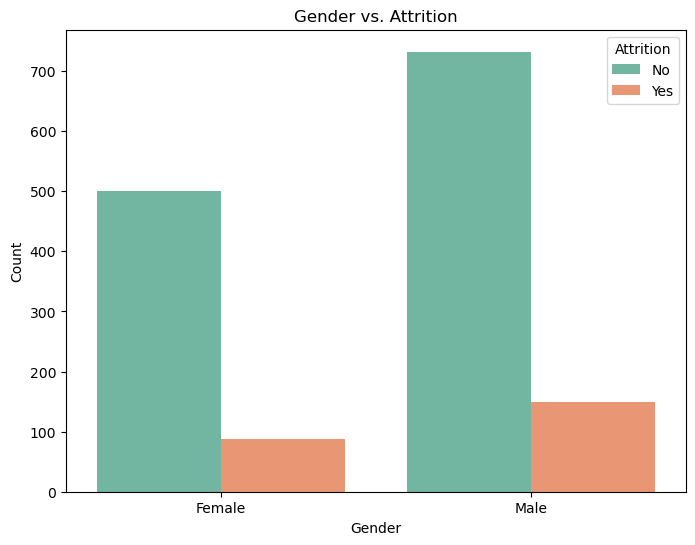

In [23]:
# Create a bar plot to visualize 'Gender' vs. 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2')
plt.title('Gender vs. Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [24]:
# Group by 'Gender' and calculate the attrition rate
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_gender)

Attrition         0         1
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


For female employees:
    

85.20% have not experienced attrition ('No').
14.80% have experienced attrition ('Yes').

For male employees:
    

82.99% have not experienced attrition ('No').
17.01% have experienced attrition ('Yes').

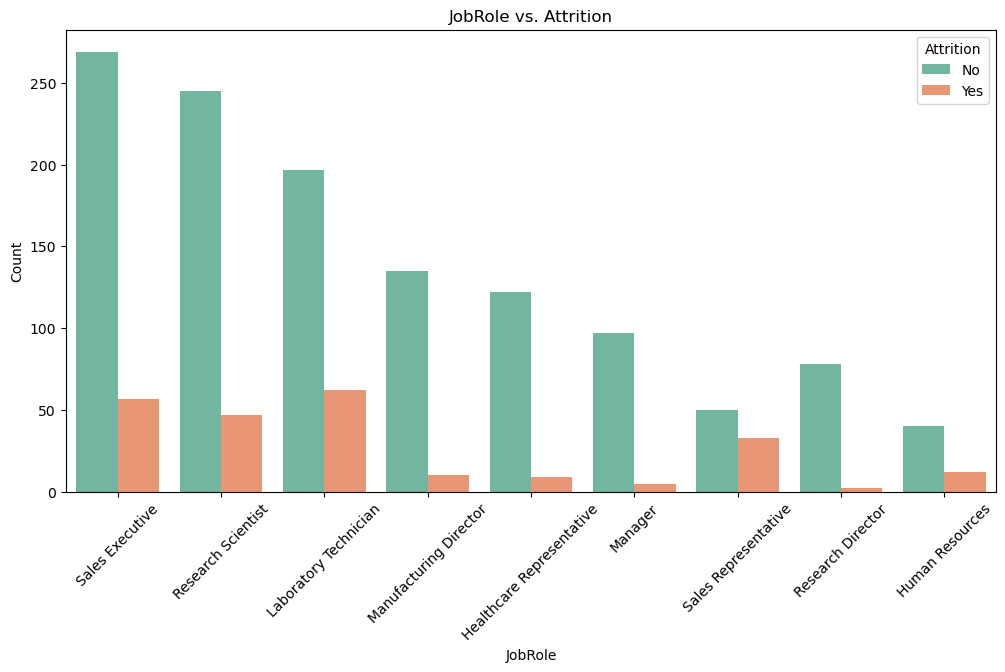

In [25]:
# Create a bar plot to visualize 'JobRole' vs. 'Attrition'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Set2')
plt.title('JobRole vs. Attrition')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [26]:
# Group by 'JobRole' and calculate the attrition rate
attrition_by_job_role = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_job_role)

Attrition                         0         1
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590


For employees in the 'Healthcare Representative' job role:
    

93.13% have not experienced attrition ('No').
6.87% have experienced attrition ('Yes').

For employees in the 'Human Resources' job role:

76.92% have not experienced attrition ('No').
23.08% have experienced attrition ('Yes').

For employees in the 'Laboratory Technician' job role:

76.06% have not experienced attrition ('No').
23.94% have experienced attrition ('Yes').

For employees in the 'Manager' job role:

95.10% have not experienced attrition ('No').
4.90% have experienced attrition ('Yes').

For employees in the 'Manufacturing Director' job role:

93.10% have not experienced attrition ('No').
6.90% have experienced attrition ('Yes').

For employees in the 'Research Director' job role:

97.50% have not experienced attrition ('No').
2.50% have experienced attrition ('Yes').

For employees in the 'Research Scientist' job role:

83.90% have not experienced attrition ('No').
16.10% have experienced attrition ('Yes').

For employees in the 'Sales Executive' job role:

82.52% have not experienced attrition ('No').
17.48% have experienced attrition ('Yes').

For employees in the 'Sales Representative' job role:

60.24% have not experienced attrition ('No').
39.76% have experienced attrition ('Yes').

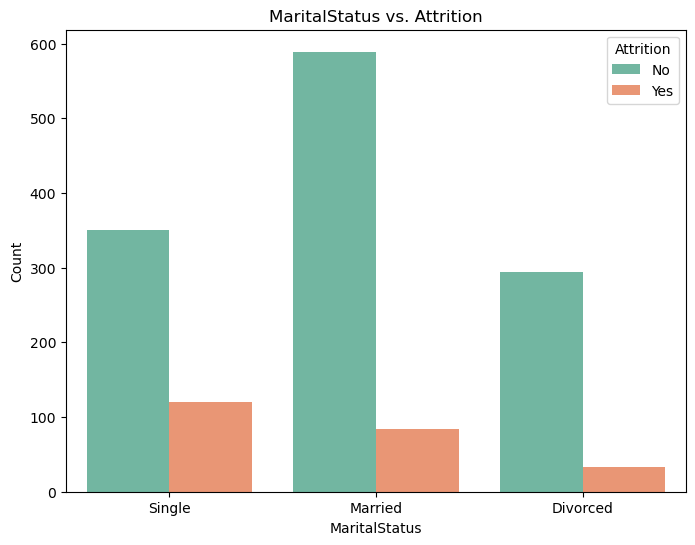

In [27]:
# Create a bar plot to visualize 'MaritalStatus' vs. 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set2')
plt.title('MaritalStatus vs. Attrition')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [28]:
# Group by 'MaritalStatus' and calculate the attrition rate
attrition_by_marital_status = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_marital_status)

Attrition             0         1
MaritalStatus                    
Divorced       0.899083  0.100917
Married        0.875186  0.124814
Single         0.744681  0.255319


For employees with a 'MaritalStatus' of 'Divorced':

89.91% have not experienced attrition ('No').
10.09% have experienced attrition ('Yes').

For employees with a 'MaritalStatus' of 'Married':

87.52% have not experienced attrition ('No').
12.48% have experienced attrition ('Yes').

For employees with a 'MaritalStatus' of 'Single':

74.47% have not experienced attrition ('No').
25.53% have experienced attrition ('Yes').

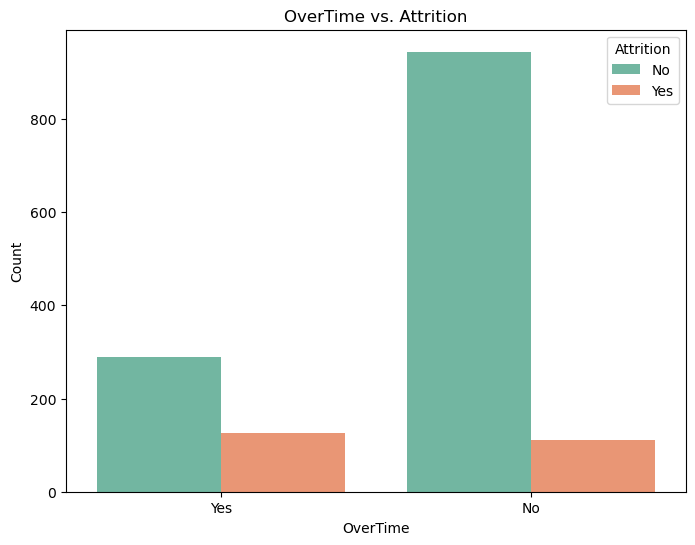

In [29]:
# Create a bar plot to visualize 'OverTime' vs. 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('OverTime vs. Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [30]:
# Group by 'OverTime' and calculate the attrition rate
attrition_by_overtime = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()

# Display the result
print(attrition_by_overtime)

Attrition         0         1
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


For employees who do not work overtime ('OverTime' = 'No'):

89.56% have not experienced attrition ('No').
10.44% have experienced attrition ('Yes').

For employees who work overtime ('OverTime' = 'Yes'):

69.47% have not experienced attrition ('No').
30.53% have experienced attrition ('Yes').

# Label Encode :Categorical column

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Apply label encoding to each of the categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [32]:
# Checking the description of the dataset.

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Check Correlation

In [33]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


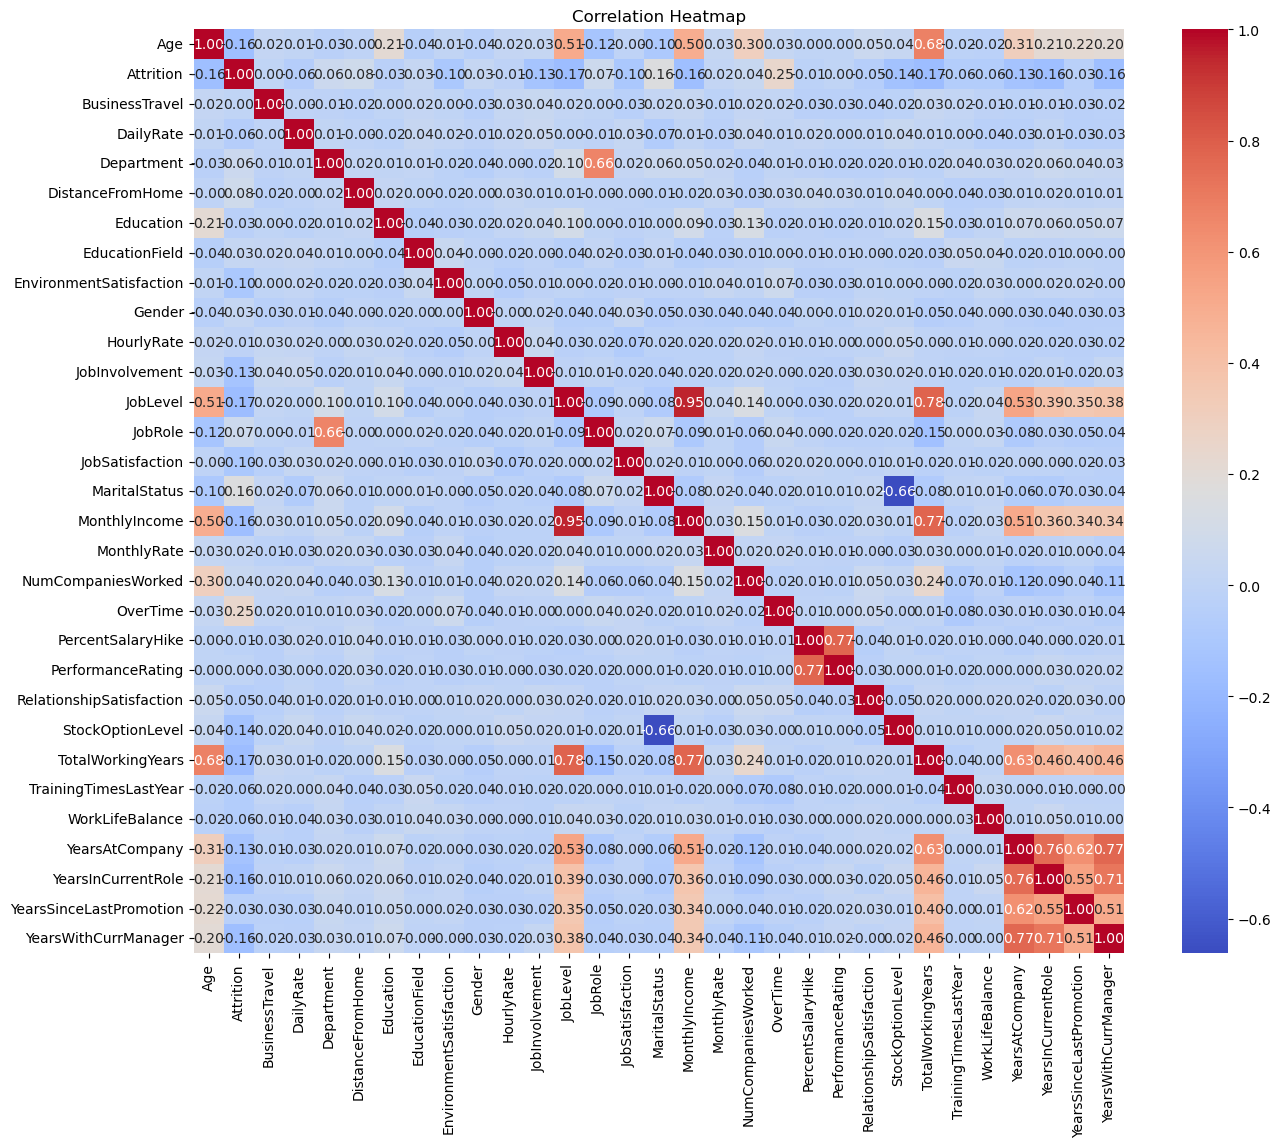

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(15, 12))

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Sort the correlation values with respect to 'Attrition'
sorted_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Display the sorted correlation values
print(sorted_correlation)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

Positive Correlation:

'OverTime': 0.246118,
'MaritalStatus': 0.162070,
'DistanceFromHome': 0.077924,
'JobRole': 0.067151,
'Department': 0.063991,
'NumCompaniesWorked': 0.043494,
'Gender': 0.029453,
'EducationField': 0.026846,
'MonthlyRate': 0.015170,
'PerformanceRating': 0.002889,
'BusinessTravel': 0.000074,
    
    
    
Negative Correlation:

'Age': -0.159205,
'MonthlyIncome': -0.159840,
'YearsInCurrentRole': -0.160545
'JobLevel': -0.169105,
'TotalWorkingYears': -0.171063,
'YearsWithCurrManager': -0.156199,
'StockOptionLevel': -0.137145,
'YearsAtCompany': -0.134392,
'JobInvolvement': -0.130016,
'EnvironmentSatisfaction': -0.103369,
'JobSatisfaction': -0.103481,
'WorkLifeBalance': -0.063939,
'TrainingTimesLastYear': -0.059478,
'DailyRate': -0.056652,
'RelationshipSatisfaction': -0.045872,
'YearsSinceLastPromotion': -0.033019,
'Education': -0.031373,
'PercentSalaryHike': -0.013478,
'HourlyRate': -0.006846

# Checking for the Outliers and Skewness in the dataset

In [37]:
 #Splitting the feature and target columns

x = df.drop(['Attrition'], axis =1)
y = df['Attrition']

In [38]:
# Checking for the Skewness

skewness=x.skew()
skewness

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [39]:
skewed_features = skewness[abs(skewness) > 0.5]
print('skewed_features:')
print(skewed_features)

skewed_features:
BusinessTravel            -1.439006
DistanceFromHome           0.958118
EducationField             0.550371
JobLevel                   1.025401
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
OverTime                   0.964489
PercentSalaryHike          0.821128
PerformanceRating          1.921883
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64


In [48]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
x_transformed = pt.fit_transform(x)
df_new = pd.DataFrame(x_transformed, columns=x.columns)
skewness_new = df_new.skew()


# Remove skewness

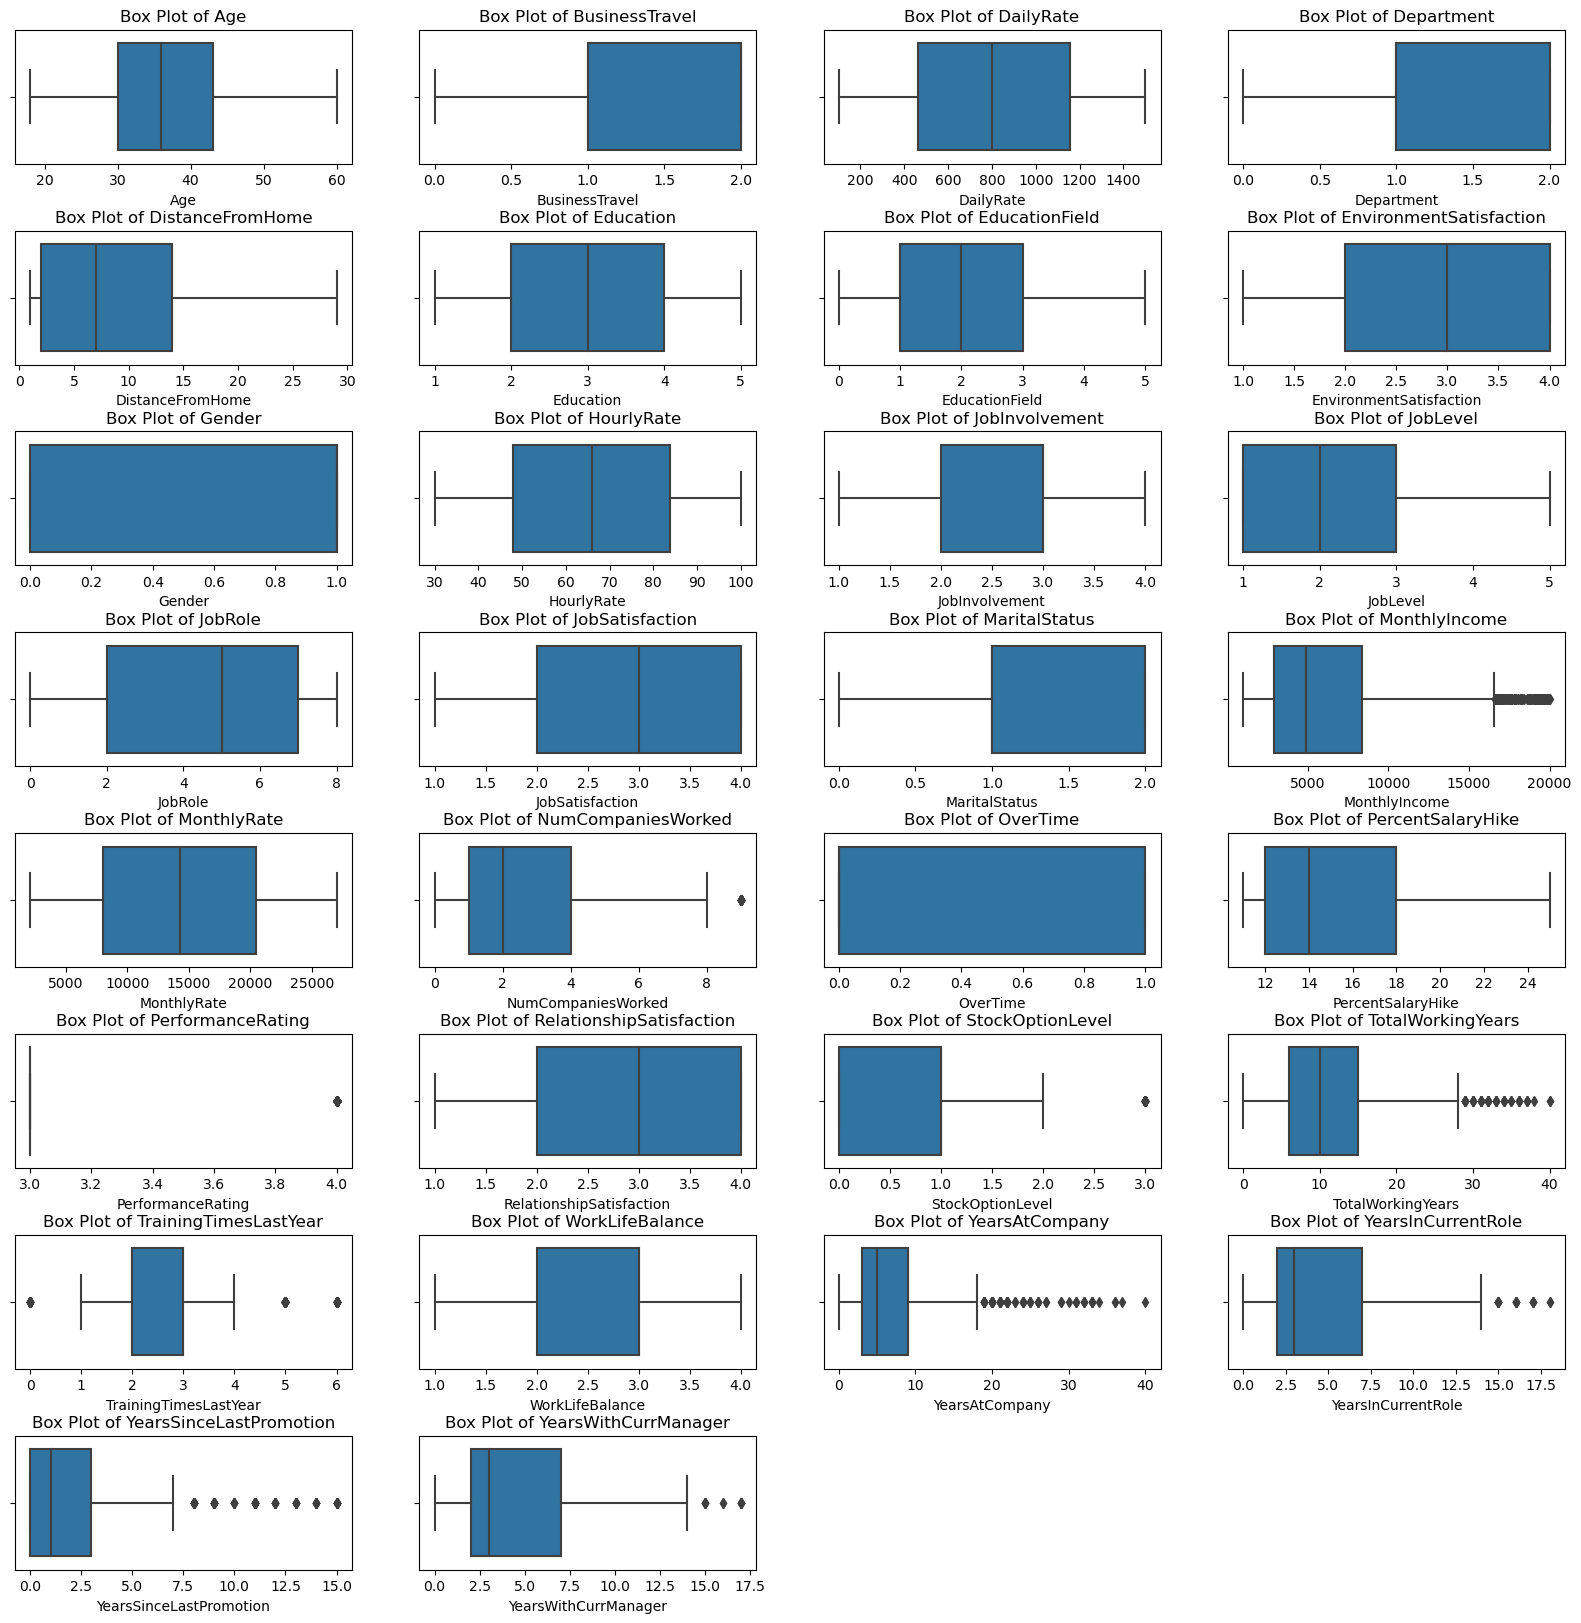

In [49]:
# Create a grid of subplots for box plots with 8 rows and 4 columns
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Exclude the 'Attrition' column (assuming it's the target variable)
features_to_plot = df.columns.difference(['Attrition'])

# Iterate through all features and create box plots
for i, column in enumerate(features_to_plot):
    ax = axes[i // 4, i % 4]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')

# Remove empty subplots if there are more than 32 features
if i < 31:
    for j in range(i + 1, 32):
        fig.delaxes(axes[j // 4, j % 4])

plt.show()

Outlier present in following Columns:'MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

# Remove outlier
Z Score Technique

In [50]:
 #Calculate Z-Scores for each data point in columns
z_scores = np.abs(stats.zscore(x))

In [51]:
z_scores.shape

(1470, 30)

In [52]:
 #Define a Z-Score threshold (e.g., Z-Score > 3 or Z-Score < -3)
threshold = 3
print(np.where(z_scores>3))

# Find and remove outliers based on Z-Scores
outlier_indices = np.where(z_scores > threshold)
cleaned_df = df.drop(df.index[outlier_indices[0]])


(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
       28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
       26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
       23, 29, 26, 28, 

In [53]:
#The shape of the original data 
df.shape

(1470, 31)

In [54]:
#The shape of the data after removing the outliers
cleaned_df.shape

(1387, 31)

# Percentage of data lost.

In [55]:
# Calculate the percentage of data lost
num_removed_outliers=1470-1387
percentage_data_lost = (num_removed_outliers / len(df)) * 100

print(f"Percentage of data lost: {percentage_data_lost:.2f}%")


Percentage of data lost: 5.65%


# Scaling Feature column

In [56]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform your features
x_scaled = scaler.fit_transform(x)

# Now 'x_scaled' contains the scaled features


# SMOTE

In [57]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [58]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the dataset to oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

# x_resampled and y_resampled now contain the oversampled data


In [59]:
# Create a DataFrame from the oversampled y_resampled
y_resampled_df = pd.Series(y_resampled)

# Count the occurrences of each class
class_counts = y_resampled_df.value_counts()

# Display the class counts
print(class_counts)

1    1233
0    1233
Name: Attrition, dtype: int64


After applying SMOTE, the target variable Attrition has been balanced, with an equal number of samples for both classes. 

# Random states to find the best 

In [61]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
best_random_state = 0

# Iterate through different random states to find the best one
for random_state in range(1, 201):
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=random_state)
    
    # Create and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this random state gives a higher accuracy
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_random_state = random_state

print(f"The best accuracy is {max_accuracy:.2f} on Random State {best_random_state}")

The best accuracy is 0.82 on Random State 200


# Split the data in training and testing

In [62]:
# Split the data into a training set (70%) and a testing set (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=200)

# Model Training

# logistic regression 

In [99]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Fit the model on the training data
logistic_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.854875283446712
Confusion Matrix:
 [[360   8]
 [ 56  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       368
           1       0.68      0.23      0.35        73

    accuracy                           0.85       441
   macro avg       0.77      0.61      0.63       441
weighted avg       0.83      0.85      0.82       441



cross_val_score

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_scores = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:", logistic_scores)
print("Mean Accuracy:", logistic_scores.mean())

Logistic Regression Cross-Validation Scores: [0.83673469 0.84693878 0.84693878 0.84013605 0.84013605]
Mean Accuracy: 0.8421768707482993


# DecisionTreeClassifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.8095238095238095
Confusion Matrix:
 [[329  39]
 [ 45  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       368
           1       0.42      0.38      0.40        73

    accuracy                           0.81       441
   macro avg       0.65      0.64      0.64       441
weighted avg       0.80      0.81      0.81       441



cross_val_score

In [102]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree_model, x, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", decision_tree_scores)
print("Mean Accuracy:", decision_tree_scores.mean())


Decision Tree Cross-Validation Scores: [0.78911565 0.78231293 0.80952381 0.74829932 0.78231293]
Mean Accuracy: 0.782312925170068


# SVC

In [103]:
from sklearn.svm import SVC

# Create an SVC classifier
svc_model = SVC(random_state=200)

# Fit the model on the training data
svc_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svc_model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.8344671201814059
Confusion Matrix:
 [[368   0]
 [ 73   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       368
           1       0.00      0.00      0.00        73

    accuracy                           0.83       441
   macro avg       0.42      0.50      0.45       441
weighted avg       0.70      0.83      0.76       441



cross_val_score

In [104]:
from sklearn.svm import SVC

svc_model = SVC()
svc_scores = cross_val_score(svc_model, x, y, cv=5, scoring='accuracy')

print("SVC Cross-Validation Scores:", svc_scores)
print("Mean Accuracy:", svc_scores.mean())

SVC Cross-Validation Scores: [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Mean Accuracy: 0.8387755102040817


# RandomForestClassifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=200)

# Fit the model on the training data
random_forest_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.8526077097505669
Confusion Matrix:
 [[367   1]
 [ 64   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       368
           1       0.90      0.12      0.22        73

    accuracy                           0.85       441
   macro avg       0.88      0.56      0.57       441
weighted avg       0.86      0.85      0.80       441



cross_val_score

In [106]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_scores = cross_val_score(random_forest_model, x, y, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", random_forest_scores)
print("Mean Accuracy:", random_forest_scores.mean())


Random Forest Cross-Validation Scores: [0.85034014 0.86394558 0.86054422 0.8537415  0.8537415 ]
Mean Accuracy: 0.8564625850340135


the Logistic Regression model achieved an accuracy of approximately 0.8548 when predicting employee attrition

# Hyperparameter Tuning¶

the Logistic Regression model achieved an accuracy of approximately 0.8526 when predicting employee attrition

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# hyperparameters and their possible values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
best_logistic_classifier = grid_search.best_estimator_
y_pred = best_logistic_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: ", accuracy)


Best Hyperparameters:  {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Best Accuracy:  0.8425668955718683
Test Set Accuracy:  0.8367346938775511


# AUC-RUC Curve

In [88]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [89]:
# Assuming you have a trained logistic regression model (best_logistic_classifier) and your test data (x_test)
y_pred_prob = best_logistic_classifier.predict_proba(x_test)[:, 1]



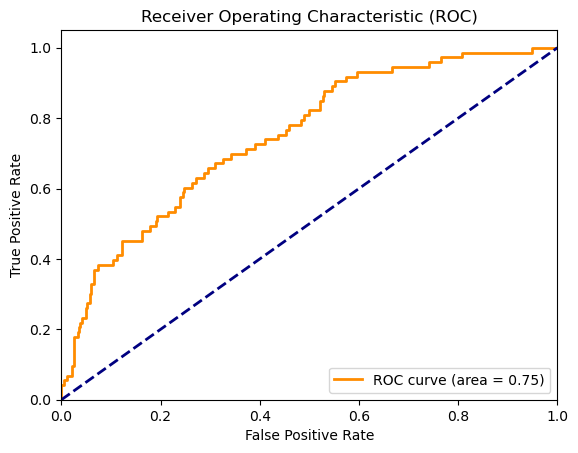

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



# Model Save

In [91]:
import joblib

# Assuming your trained logistic regression model is named 'best_logistic_classifier'
model_filename = 'logistic_regression_model.pkl'

# Save the model to a file
joblib.dump(best_logistic_classifier, model_filename)


['logistic_regression_model.pkl']

# Conclusion

In [92]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results_df.to_csv('your_results_file.csv', index=False)


In [93]:
results_df

,Original,Predicted
388,0,0
262,0,0
904,0,0
87,0,0
1324,0,0
...,...,...
119,0,0
663,1,0
243,0,0
536,0,0


In [94]:
from sklearn.linear_model import LogisticRegression

# Assuming you have already split your data into training and testing sets
# and defined x_train, y_train, x_test, and y_test

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model with your training data
logistic_model.fit(x_train, y_train)

# Now, you can use the fitted model for predictions
predicted = logistic_model.predict(x_test)

# Create a DataFrame to compare the original and predicted values
a = np.array(y_test)
df_conclusion = pd.DataFrame({"Original": a, "Predicted": predicted}, index=range(len(a)))

# Display the DataFrame
print(df_conclusion)


     Original  Predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
..        ...        ...
436         0          0
437         1          0
438         0          0
439         0          0
440         0          0

[441 rows x 2 columns]
